# Early Stopping

------

# 0 .기존 작업

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x, y), (x_test, y_test) = fashion_mnist.load_data()


from tensorflow.keras.utils import to_categorical

x = x.astype('float32') 
x_test = x_test.astype('float32')

x /= 255
x_test /= 255

y = to_categorical(y, 10)
y_test = to_categorical(y_test, 10)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(64, 'relu'))
    model.add(Dense(128, 'relu'))
    model.add(Dense(units=10, activation='softmax'))
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                 metrics=['accuracy'])

    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 36,842
Trainable params: 36,842
Non-trainable params: 0
_________________________________________________________________


---

# 1. callback 만들기

https://keras.io/callbacks/#earlystopping

- monitor: early stopping을 결정하는 기준
- min_delta: 이거보다 변화가 작으면 멈춘다.
- patience: 이 숫자의 epoch만큼 변하지 개선(감소)되지 않으면 멈춘다. (2로 설정시, 2연속 val_loss가 증가하면 train 중지)


In [2]:
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
es = EarlyStopping(monitor='val_loss', patience=2)

In [4]:
model = create_model()

history = model.fit(x, y,  epochs = 20, validation_split = 1/6,callbacks = [es], batch_size= 512)

Epoch 1/20
98/98 [==============================] - 2s 18ms/step - accuracy: 0.6781 - loss: 0.9138 - val_accuracy: 0.8133 - val_loss: 0.5266
Epoch 2/20
98/98 [==============================] - 1s 11ms/step - accuracy: 0.8323 - loss: 0.4809 - val_accuracy: 0.8315 - val_loss: 0.4716
Epoch 3/20
98/98 [==============================] - 1s 12ms/step - accuracy: 0.8460 - loss: 0.4318 - val_accuracy: 0.8513 - val_loss: 0.4212
Epoch 4/20
98/98 [==============================] - ETA: 0s - accuracy: 0.8572 - loss: 0.40 - ETA: 0s - accuracy: 0.8575 - loss: 0.40 - 1s 12ms/step - accuracy: 0.8574 - loss: 0.4011 - val_accuracy: 0.8548 - val_loss: 0.4076
Epoch 5/20
98/98 [==============================] - 1s 11ms/step - accuracy: 0.8647 - loss: 0.3786 - val_accuracy: 0.8605 - val_loss: 0.3939
Epoch 6/20
98/98 [==============================] - 1s 11ms/step - accuracy: 0.8706 - loss: 0.3616 - val_accuracy: 0.8535 - val_loss: 0.4041
Epoch 7/20
98/98 [==============================] - 1s 12ms/step - acc

In [5]:
import matplotlib.pyplot as plt

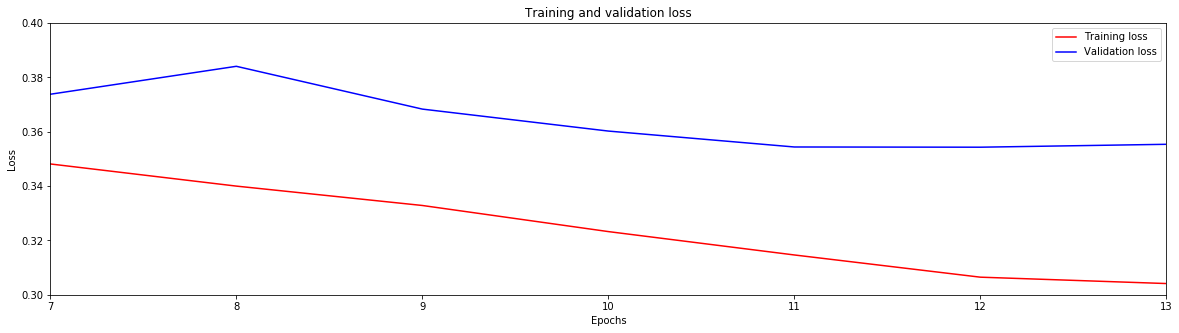

In [6]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(20,5))
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.xlim(7,13)
plt.ylim(0.3,0.4)

plt.show()